In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\31ash\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\31ash\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
##Drop month,day,year
df.drop(['day','month','year'],axis=1,inplace=True)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
#Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [11]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [12]:
#Independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [13]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [14]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [15]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
X_train.shape

(182, 11)

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features=correlation(X_train,0.85)

In [20]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape

(182, 9)

# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'X_train After Scaling')

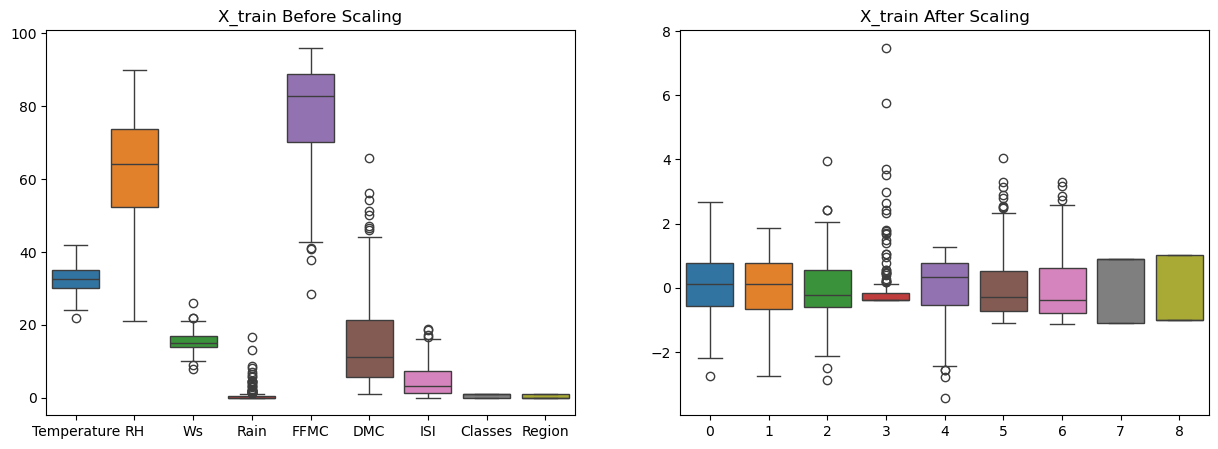

In [23]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression

Mean absolute error 0.5468236465249986
R2 Score 0.9847657384266951


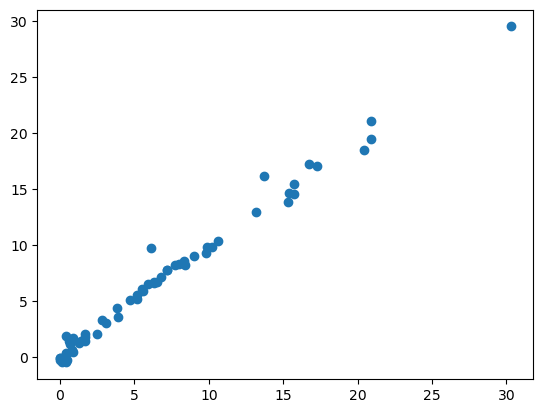

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

In [29]:
## Lasso Regression

Mean absolute error 1.1331759949144087
R2 Score 0.9492020263112388


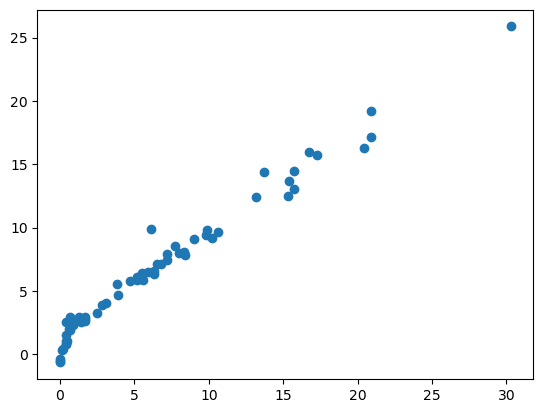

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

In [31]:
#Ridge Regression

Mean absolute error 0.5642305340105698
R2 Score 0.9842993364555513


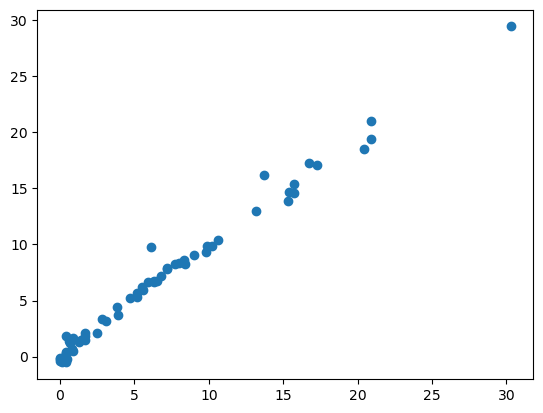

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
rid=Ridge()
rid.fit(X_train_scaled,y_train)
y_pred=rid.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

In [33]:
##ElasticNet Regression

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


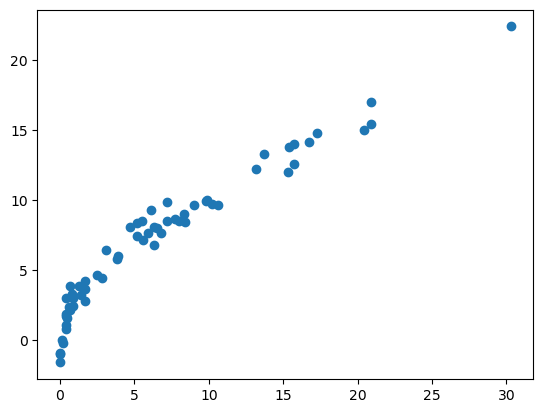

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
net=ElasticNet()
net.fit(X_train_scaled,y_train)
y_pred=net.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

In [35]:
## Cross Validation Lasso

In [38]:
from sklearn.linear_model import LassoCV
lasso=LassoCV(cv=5)
lasso.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [39]:
lasso.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [42]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rid,open('rid.pkl','wb'))